In [1]:
import math

In [2]:
# Example dataset
# Number of element in each class
n_A=4
n_B=6
total=n_A+n_B

In [3]:
# lets calculate the prportions
p_A=n_A/total
p_B=n_B/total
print("Proportion of A: ",p_A)
print("Proportion of B: ",p_B)

Proportion of A:  0.4
Proportion of B:  0.6


In [5]:
# Entropy
Entropy=-p_A*math.log2(p_A)-p_B*math.log2(p_B)
print("Entropy: ", Entropy)

Entropy:  0.9709505944546686


In [6]:
# Gini Impurity
gini= 1-p_A**2-p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [8]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = Entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)


Information Gain:  0.0


Based on our example dataset with two classes (A and B), we have calculated the following values:

1. **Entropy:** The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

2. **Gini Impurity:** The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

3. **Information Gain:** The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

# Decision Tree

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [27]:
df=sns.load_dataset('titanic')

In [28]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [29]:
# drop deck column
df.drop(['deck','alive'],axis=1,inplace=True)
# impute missing value of age and fare with median
imputer = SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town','embarked']]=imputer.fit_transform(df[['embark_town','embarked']])

In [30]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [31]:
le=LabelEncoder()
for col in df.select_dtypes(include=['object','category']).columns:
    df[col]=le.fit_transform(df[col])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(5), int64(4)
memory usage: 61.0 KB


In [33]:
# split the data
X=df.drop('survived',axis=1)
y=df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# create and train the model
model=DecisionTreeClassifier(criterion='entropy') # can use log_loss, gini instead of entropy
model.fit(X_train,y_train)

# predict the test data
y_pred=model.predict(X_test)

In [35]:
# evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82 23]
 [23 51]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



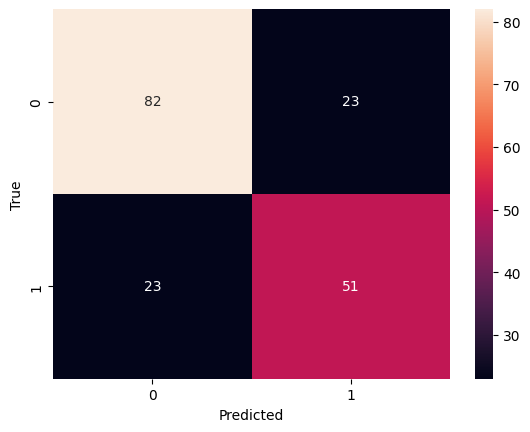

In [37]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# save the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/Decision_tree_01.dot', feature_names=X.columns, class_names=['died','survived'], filled=True, rounded=True)

# Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df=sns.load_dataset('Tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [41]:
for col in df.select_dtypes(include=['object','category']).columns:
    df[col]=le.fit_transform(df[col])

In [42]:
X= df.drop('tip',axis=1)
y=df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred=DTR.predict(X_test)

In [44]:
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('R^2: ',r2_score(y_test,y_pred))

Mean Squared Error:  1.251061224489796
R^2:  -0.0008719233613752042


Text(0, 0.5, 'Predicted')

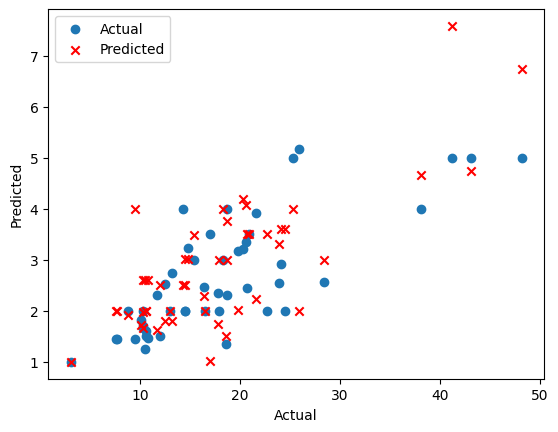

In [51]:
# viualize the actual vs predicted values
plt.scatter(X_test['total_bill'],y_test)
plt.scatter(X_test['total_bill'],y_pred,marker='x',color='r')
plt.legend(['Actual','Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [45]:
# visualize the decision tree
export_graphviz(DTR, out_file='./saved_models/Decision_tree_Regressor_02.dot', feature_names=X.columns, filled=True, rounded=True) 